<a href="https://colab.research.google.com/github/YanNews2805/HomeCredit/blob/main/Limpeza_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%pylab inline
dataset = pd.read_csv('application_train.csv')

Populating the interactive namespace from numpy and matplotlib


#Extraíndo informações do dataset

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Variáveis com menos de 1.2% de correlação com o TARGET

In [27]:
target_corr = dataset.corrwith(dataset['TARGET'], method='pearson') 
x = abs(target_corr)

# 106 variáveis numéricas

def media(x):
  sum = 0
  In = 0
  for i in x:
    if i != float(i):
      continue
    In += 1
    sum += float(abs(i))
  media = sum/106
  return media


media(x)
print('40% da média é', 0.4 * media(x))

def baixacorr(x):
  sum = 0
  for i in x:
    if i < 0.40*(media(x)):
      sum += 1
  return sum


print('Porcentagem retirada:',baixacorr(x)/1.06,'Serão retiradas:',baixacorr(x),'variáveis')  

# 46 retiradas
# 40% da média = 0.01327203623512337
# média = 0.03318009058780842

40% da média é 0.013556336194610977
Porcentagem retirada: 43.39622641509434 Serão retiradas: 46 variáveis


#Dropando variáveis com menos de 1.3% de correlação

In [28]:
dataset = dataset.drop(columns=['SK_ID_CURR','AMT_INCOME_TOTAL','ENTRANCES_AVG','ENTRANCES_MODE','ENTRANCES_MEDI','AMT_ANNUITY','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAIL',
                                'CNT_FAM_MEMBERS','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','YEARS_BEGINEXPLUATATION_AVG','LANDAREA_MEDI',
                                'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_4',
                                'FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
                                'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                                'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','LANDAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
                                'YEARS_BEGINEXPLUATATION_MODE','COMMONAREA_MODE','LANDAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','YEARS_BEGINEXPLUATATION_MEDI'])



In [29]:
dataset.select_dtypes(include='object').describe()
dataset.replace('Maternity leave','Working',inplace=True)
dataset['NAME_FAMILY_STATUS'].value_counts()
dataset.replace('Unknown','Single / not married',inplace=True)
dataset['NAME_INCOME_TYPE'].value_counts()
dataset.select_dtypes(include='object').describe()
dataset['CODE_GENDER'].value_counts()
dataset.replace('XNA','F',inplace=True)

#Extraíndo informações das variáveis categóricas

In [30]:
dataset.select_dtypes(include='object').describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,2,2,2,7,7,5,5,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202452,202924,213312,248526,158779,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


# Categóricas descatáveis

In [31]:
'''
Descarte

OCCUPATION_TYPE	= (18 variáveis, Labores = 25%), (TEM 32% DOS DADOS FALTANDO)
ORGANIZATION_TYPE	= (58 variáveis, Business Entity Type 3	= 20%), (TEM 66% DOS DADOS FALTANDO)
WALLSMATERIAL_MODE	= (7 variáveis, Panel	= 40%), (TEM 50% DOS DADOS FALTANDO)
WEEKDAY_APPR_PROCESS_START	= (7 variáveis, TUESDAY = 16%)
FONDKAPREMONT_MODE = binaria (4 variáveis, reg oper account = 70%)(68% dos dados faltando)
'''

'\nDescarte\n\nOCCUPATION_TYPE\t= (18 variáveis, Labores = 25%), (TEM 32% DOS DADOS FALTANDO)\nORGANIZATION_TYPE\t= (58 variáveis, Business Entity Type 3\t= 20%), (TEM 66% DOS DADOS FALTANDO)\nWALLSMATERIAL_MODE\t= (7 variáveis, Panel\t= 40%), (TEM 50% DOS DADOS FALTANDO)\nWEEKDAY_APPR_PROCESS_START\t= (7 variáveis, TUESDAY = 16%)\nFONDKAPREMONT_MODE = binaria (4 variáveis, reg oper account = 70%)(68% dos dados faltando)\n'

#Dropando variáveis categóricas dispensáveis ao modelo

In [32]:
dataset = dataset.drop(columns=['ORGANIZATION_TYPE','WALLSMATERIAL_MODE','WEEKDAY_APPR_PROCESS_START','FONDKAPREMONT_MODE'])


In [35]:
dx = dataset.drop(columns=['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','CODE_GENDER','FLAG_OWN_CAR',
                                            'FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                                            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                                            'HOUSETYPE_MODE','EMERGENCYSTATE_MODE'] )


#Mapa de calor de correlação

In [36]:
target_corr = dx.corrwith(dx['TARGET'], method='pearson') 
x = abs(target_corr)
j = []

for i in dx:
  j.append(i)
df = pd.DataFrame({'index': j,
                   'Correlação': x})
df = df.set_index('index')
df = df.sort_values('Correlação')

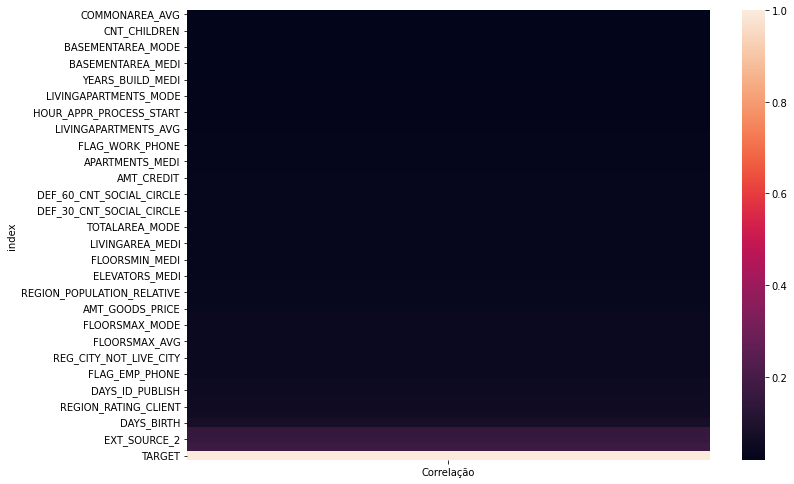

In [37]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.heatmap(df)
plt.savefig('correlação.png')

#Avaliando gráfico de valores nulos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


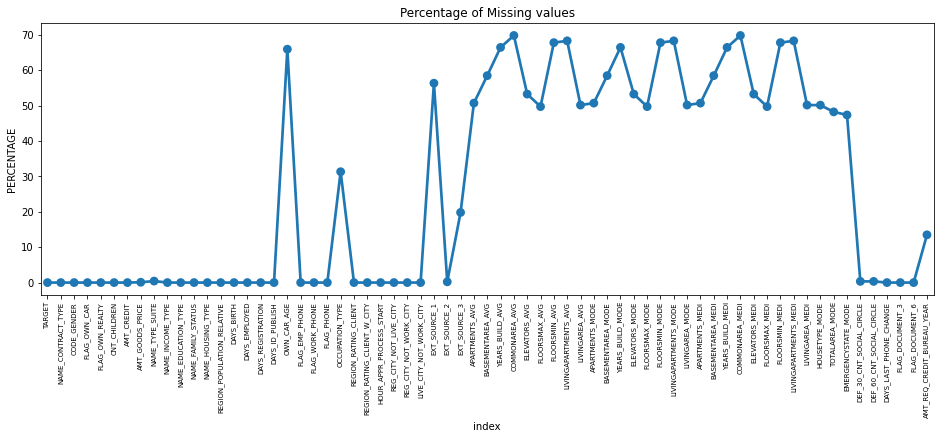

In [38]:
missing = pd.DataFrame( (dataset.isnull().sum()) * 100 / dataset.shape[0]).reset_index()

plt.figure(figsize = (16,5))
ax = sns.pointplot('index', 0, data = missing)

plt.xticks(rotation = 90, fontsize = 7)

plt.title("Percentage of Missing values")

plt.ylabel("PERCENTAGE")

plt.show()

#Preenchendo valores vazios nas variáveis categóricas

In [39]:
# Método = variável mais frequente

dataset = dataset.fillna({
    'OCCUPATION_TYPE':'Laborers',
    'NAME_TYPE_SUITE':'Unaccompanied',
    'HOUSETYPE_MODE':'block of flats',
    'EMERGENCYSTATE_MODE':'No'})

In [40]:
dataset.select_dtypes(include='number').describe() #50% = mediana

,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,ELEVATORS_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,103023.000000,92646.000000,143620.000000,154491.000000,98869.000000,97312.000000,153161.000000,151450.000000,127568.000000,103023.000000,143620.000000,154491.000000,98869.000000,97312.000000,153161.000000,151450.000000,127568.000000,103023.000000,92646.000000,143620.000000,154491.000000,98869.000000,97312.000000,153161.000000,159080.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,265992.000000
mean,0.080729,0.417052,5.990260e+05,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.819889,0.199368,0.281066,2.052463,2.031521,12.063419,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.752471,0.044621,0.078942,0.226282,0.231894,0.100775,0.107399,0.114231,0.087543,0.759637,0.074490,0.222315,0.228058,0.105645,0.105975,0.117850,0.087955,0.755746,0.044595,0.078078,0.225897,0.231625,0.101954,0.108607,0.102547,0.143421,0.100049,-962.858788,0.710023,0.088055,1.899974
std,0.272419,0.722121,4.024908e+05,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.384280,0.399526,0.449521,0.509034,0.502737,3.265832,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.113280,0.076036,0.134576,0.144641,0.161380,0.092576,0.110565,0.107936,0.084307,0.110111,0.132256,0.143709,0.161160,0.097880,0.111845,0.109076,0.082179,0.112066,0.076144,0.134467,0.145067,0.161934,0.093642,0.112260,0.107462,0.446698,0.362291,826.808487,0.453752,0.283376,1.869295
min,0.000000,0.000000,4.500000e+04,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.700000e+05,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.334007,3.924574e-01,0.370650,0.05770,0.044200,0.687200,0.007800,0.000000,0.166700,0.083300,0.050400,0.045300,0.052500,0.040700,0.699400,0.000000,0.166700,0.083300,0.054200,0.042700,0.058300,0.043700,0.691400,0.007900,0.000000,0.166700,0.083300,0.051300,0.045700,0.041200,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.135310e+05,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,12.00

#Preenchendo valores vazios nas variáveis numéricas

In [41]:
#Método = mediana

dataset = dataset.fillna({
    'YEARS_BUILD_MEDI':0.758500,            
    'COMMONAREA_MEDI':0.020800,             
    'ELEVATORS_MEDI':0.000000,               
    'FLOORSMAX_MEDI':0.166700,               
    'FLOORSMIN_MEDI':0.208300,              
    'LIVINGAPARTMENTS_MEDI':0.076100,       
    'LIVINGAREA_MEDI':0.074600,              
    'TOTALAREA_MODE':0.068600,               
    'DEF_30_CNT_SOCIAL_CIRCLE':0.000000,     
    'DEF_60_CNT_SOCIAL_CIRCLE':0.000000,     
    'DAYS_LAST_PHONE_CHANGE':-755.000000,       
    'AMT_REQ_CREDIT_BUREAU_YEAR':1.000000,
    'LIVINGAPARTMENTS_AVG':0.075100,      
    'LIVINGAREA_AVG':0.074300,              
    'APARTMENTS_MODE':0.084000,              
    'BASEMENTAREA_MODE':0.074500,        
    'YEARS_BUILD_MODE':0.764800,          
    'ELEVATORS_MODE':0.000000,             
    'FLOORSMAX_MODE':0.166700,
    'FLOORSMIN_MODE':0.208300,            
    'LIVINGAPARTMENTS_MODE':0.075300,     
    'LIVINGAREA_MODE':0.072900,            
    'APARTMENTS_MEDI':0.086400,             
    'BASEMENTAREA_MEDI':0.075700,
    'AMT_GOODS_PRICE':4.500000e+05,
    'OWN_CAR_AGE': 9.000000,
    'EXT_SOURCE_1':0.507710	,                 
    'EXT_SOURCE_2':5.663911e-01,              
    'EXT_SOURCE_3':0.535276,               
    'APARTMENTS_AVG':0.087600,             
    'BASEMENTAREA_AVG':0.076200,            
    'YEARS_BUILD_AVG':0.755200,            
    'COMMONAREA_AVG':0.021000,              
    'ELEVATORS_AVG':0.000000,              
    'FLOORSMAX_AVG':0.166700,               
    'FLOORSMIN_AVG':0.208300                          
     })

#Transformando variáveis categóricas em numéricas

In [42]:
dataset = pd.get_dummies(dataset, columns=['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','CODE_GENDER','FLAG_OWN_CAR',
                                            'FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                                            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
                                            'HOUSETYPE_MODE','EMERGENCYSTATE_MODE'])           

# Criando novo dataset com o dataset limpo

In [43]:
df = dataset.to_csv('dataset_regressão_full1.csv')